In [1]:
import sys
import os
import numpy as np
import pandas as pd
from   astropy.table       import Table
import matplotlib.pyplot as plt



plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

codefolder = "../SoHAPPy/" 
sys.path.append(".") 
sys.path.append(codefolder)

In [2]:
basename = r"D:\000_Today\prompt-visible-nofluctuation-z"
#basename = r"D:\000_Today\prompt-visible-accelerate-z"
zlist = [0,0.2,0.5,1.0,2.0,3.0,4.0]
evtlist = [2, 6,12, 30, 139, 172, 191, 278, 506]
# Dictionnary for z
res = {}
for z in zlist:
    dirname = basename + str(z) 
    #print(dirname)
    dataname    = dirname+"/data.txt"
    csvfilename = os.path.splitext(dataname)[0] +".csv" # Build csv filename
    if not os.path.isfile(csvfilename):
        data = Table.read(dataname,format="ascii",guess=False)
        data.write(csvfilename, format="ascii.csv",overwrite="True")    
        print(csvfilename, " created")
    else:
        print(csvfilename, " exists")

    # analyse
    grb    = pd.read_csv(csvfilename)
    grb = grb[grb.site=="North"]
    #print(" File length = ",len(grb))
    for idx, g in grb.iterrows():
        evt = g["name"]
        evtn =int(evt[evt.find("_")+1:])
        sig = g.sigmx
        res[z,evtn]=sig
#res

D:\000_Today\prompt-visible-nofluctuation-z0/data.csv  created
D:\000_Today\prompt-visible-nofluctuation-z0.2/data.csv  created
D:\000_Today\prompt-visible-nofluctuation-z0.5/data.csv  created
D:\000_Today\prompt-visible-nofluctuation-z1.0/data.csv  created
D:\000_Today\prompt-visible-nofluctuation-z2.0/data.csv  created
D:\000_Today\prompt-visible-nofluctuation-z3.0/data.csv  created
D:\000_Today\prompt-visible-nofluctuation-z4.0/data.csv  created


 Evt      0.0    0.2    0.5    1.0    2.0    3.0    4.0
 2      157.9   17.8   10.5    6.2    3.3    2.4    2.3
 6       16.2   12.5   11.5    9.8    7.3    6.3    5.9
 12      13.9    7.6    7.0    5.9    4.3    3.5    3.3
 30      32.8   15.6   14.2   12.1    9.8    8.6    8.0
 139    283.1  195.1  172.7  140.7  104.9   91.0   87.4
 172     16.1   13.4   12.5   10.7    7.9    6.7    6.4
 191     87.6   47.6   40.3   31.0   21.4   18.0   16.9
 278    467.4  116.7   86.0   59.8   38.2   31.1   29.5
 506   1389.0  477.8  397.0  317.6  241.0  212.5  205.1


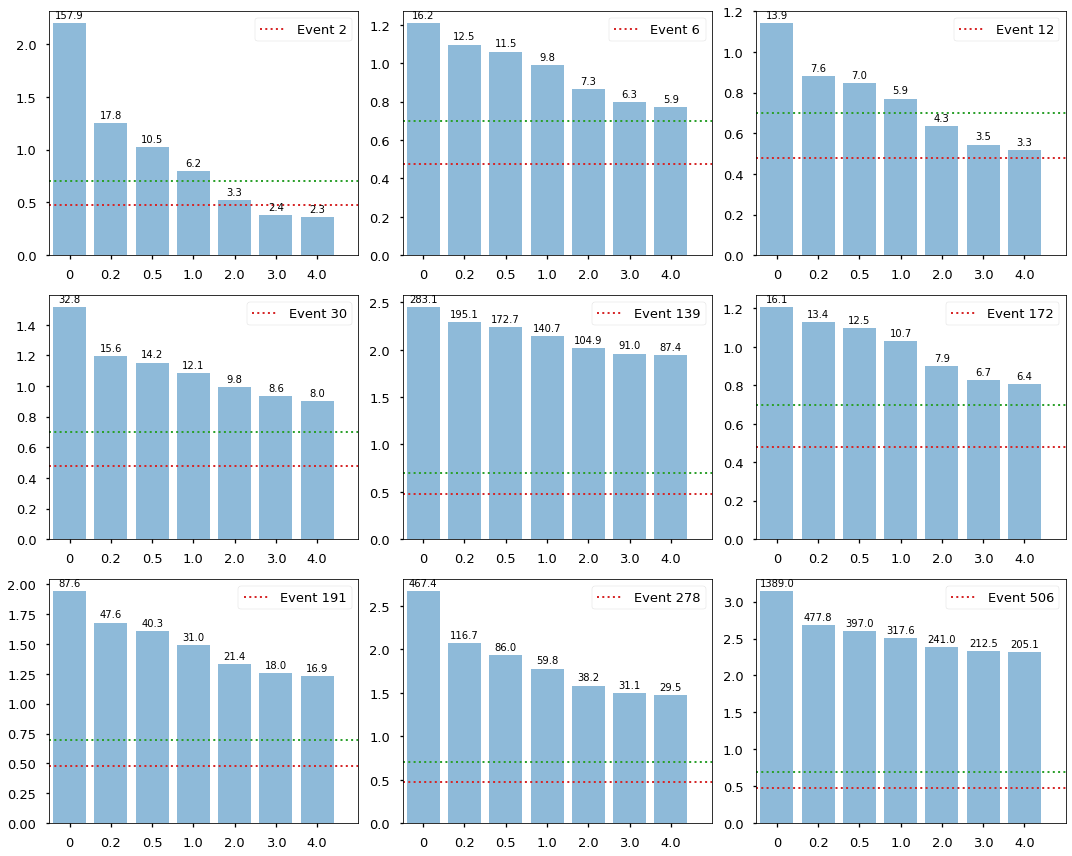

In [3]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,12))
iplt = 0

ax = ax.flatten()
print(" {:<5s}".format("Evt"),end="")
for z in zlist:
    print(" {:>6.1f}".format(z),end="")
print()

for evt in evtlist:
    print(" {:<5d}".format(evt),end="")
    for i,z in enumerate(zlist):
        #print("z = ",z," evt=",evt," -> ",res[z,evt])
        
        sig = res[(z,evt)]
        if sig>0: 
            print(" {:>6.1f}".format(sig),end="")
            logsig = np.log10(sig)
            rect = ax[iplt].bar(i,height=max(logsig,0),color="tab:blue",alpha=0.5)
            ax[iplt].annotate('{}'.format(sig),
                        xy= (i, logsig),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            print(" {:^5s}".format("-"),end="")

    #ax[iplt].set_title("Evt="+str(evt))
    ax[iplt].set_xticklabels(zlist)
    ax[iplt].set_xticks([x for x in range(len(zlist))])
    ax[iplt].axhline(y=np.log10(3),color="tab:red",ls=":",lw=2,label="Event "+ str(evt))
    ax[iplt].axhline(y=np.log10(5),color="tab:green",ls=":",lw=2)
    ax[iplt].set_xlim([-0.5, len(zlist)])
    ax[iplt].legend()
    iplt+=1
    print()
plt.tight_layout()
plt.show()


In [ ]:
for r in rect:
    print(r)